<a href="https://colab.research.google.com/github/mgarbanzo/GOESR_Fundamentos/blob/main/GOES_R_FUNDAMENTOS_Generaci%C3%B3n_de_RGB_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

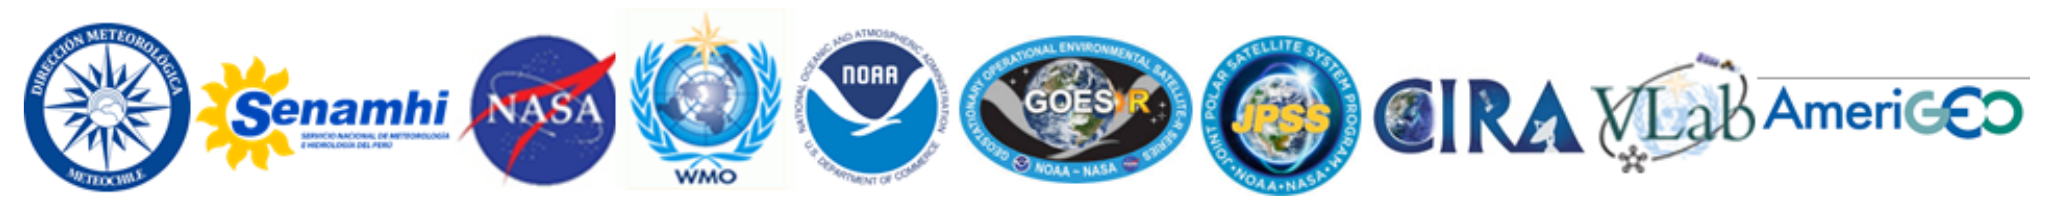

# Práctica de Python en la nube para generar el producto del GLM de GOES 16

##Taller‌ ‌Virtual‌ ‌sobre‌ ‌Aplicaciones‌ ‌Satelitales‌ ‌OMM‌ ‌AR-III‌

La **meta de aprendizaje** para este cuaderno es comprender como se utilizan matrices básicas en Python para generar los colores que observamos en las pantallas y como eso se puede utilizar para generar imágenes tipo RGB a partir de información satelital.

Nivel Básico

Lo primero que se necesita en Python son las librerías para funcionamiento más allá de lo básico.

In [ ]:
import numpy as np         # Manipulación de arreglos numéricos
import pylab as plt        # Graficación de datos

# Se define una matriz de $(4x4)$ $x3$ de profundidad

Las capas de profundidad son las que definen el tono final al graficar.

Los valores por cada capa deben estar normalizados entre 0 y 1 para generar el color final, donde 0 es ninguna componente y 1 sería toda la componente de un color.

Una matriz de ceros debe entonces ser de color negro:

In [ ]:
COLORES = np.zeros((4,4,3))

In [ ]:
np.shape(COLORES)

(4, 4, 3)

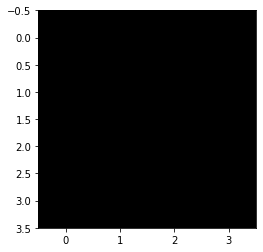

In [ ]:
plt.figure()
plt.imshow(COLORES)

Si la primera capa (nivel 0 en Python) de la matriz COLORES se establece como 1, entonces el color ROJO representado por esa capa será total y no tendrá ningún otro color, ya que la capa 1 y 2 siguen teniendo valores de 0.

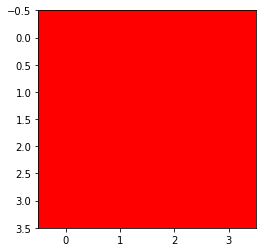

In [ ]:
COLORES = np.zeros((4,4,3))
COLORES[:,:,0]=1
plt.figure()
plt.imshow(COLORES)

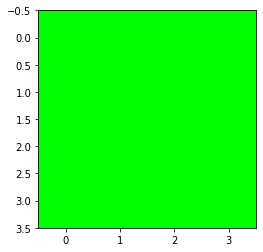

In [ ]:
COLORES = np.zeros((4,4,3))
COLORES[:,:,1]=1
plt.figure()
plt.imshow(COLORES)

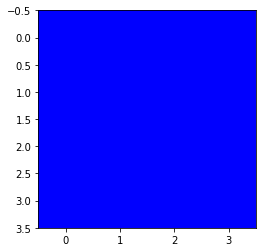

In [ ]:
COLORES = np.zeros((4,4,3))
COLORES[:,:,2]=1
plt.figure()
plt.imshow(COLORES)

# Se pueden combinar diferentes valores en las capas para generar diferentes colores:

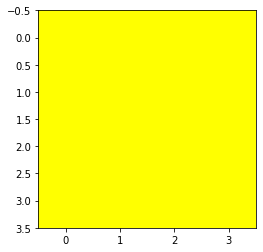

In [ ]:
COLORES = np.zeros((4,4,3))
COLORES[:,:,0]=1
COLORES[:,:,1]=1
COLORES[:,:,2]=0
plt.figure()
plt.imshow(COLORES)

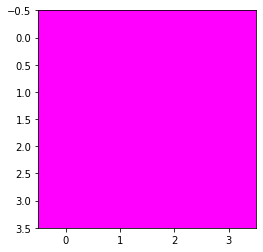

In [ ]:
COLORES = np.zeros((4,4,3))
COLORES[:,:,0]=1
COLORES[:,:,1]=0
COLORES[:,:,2]=1
plt.figure()
plt.imshow(COLORES)

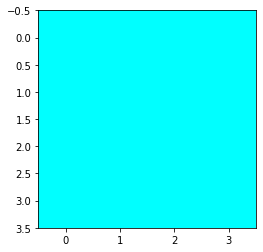

In [ ]:
COLORES = np.zeros((4,4,3))
COLORES[:,:,0]=0
COLORES[:,:,1]=1
COLORES[:,:,2]=1
plt.figure()
plt.imshow(COLORES)

# Todas las capas con valores de 1 significaría que la matriz tiene cada punto con todo el rojo, todo el verde y todo el azul.

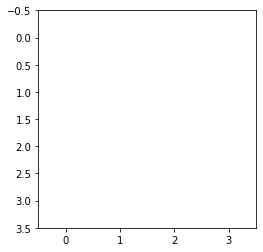

In [ ]:
COLORES = np.zeros((4,4,3))
COLORES[:,:,0]=1
COLORES[:,:,1]=1
COLORES[:,:,2]=1
plt.figure()
plt.imshow(COLORES)

# Los colores se pueden establecer de manera individual. 

**Es en este punto donde las mediciones satelitales permiten asignar a cada punto de una imagen el valor correspondiente observado por los sensores.**

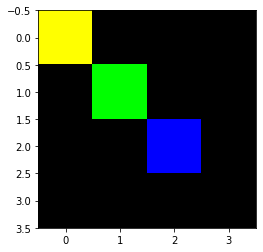

In [ ]:
COLORES = np.zeros((4,4,3))
COLORES[1,1,1]=1
COLORES[0,0,0]=1
COLORES[0,0,1]=1
COLORES[2,2,2]=1
plt.figure()
plt.imshow(COLORES)

# Haciendo un RGB simple con datos del GOES 16

In [ ]:
pip install netcdf4

In [ ]:
!wget -c https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2021/104/16/OR_ABI-L2-CMIPF-M6C01_G16_s20211041630185_e20211041639493_c20211041639567.nc
!wget -c https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2021/104/16/OR_ABI-L2-CMIPF-M6C02_G16_s20211041630185_e20211041639493_c20211041639565.nc
!wget -c https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2021/104/16/OR_ABI-L2-CMIPF-M6C03_G16_s20211041630185_e20211041639493_c20211041639567.nc

--2021-07-02 15:53:08--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2021/104/16/OR_ABI-L2-CMIPF-M6C01_G16_s20211041630185_e20211041639493_c20211041639567.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.217.44.124
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.217.44.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99052942 (94M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C01_G16_s20211041630185_e20211041639493_c20211041639567.nc’

OR_ABI-L2-CMIPF-M6C 100%[===================>]  94.46M  28.6MB/s    in 3.3s    

2021-07-02 15:53:12 (28.6 MB/s) - ‘OR_ABI-L2-CMIPF-M6C01_G16_s20211041630185_e20211041639493_c20211041639567.nc’ saved [99052942/99052942]

--2021-07-02 15:53:12--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2021/104/16/OR_ABI-L2-CMIPF-M6C02_G16_s20211041630185_e20211041639493_c20211041639565.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 5

In [ ]:
from netCDF4 import Dataset
C1 = Dataset('OR_ABI-L2-CMIPF-M6C01_G16_s20211041630185_e20211041639493_c20211041639567.nc')
C2 = Dataset('OR_ABI-L2-CMIPF-M6C02_G16_s20211041630185_e20211041639493_c20211041639565.nc')
C3 = Dataset('OR_ABI-L2-CMIPF-M6C03_G16_s20211041630185_e20211041639493_c20211041639567.nc')

In [ ]:
ROJO = C2.variables['CMI'][:][::8,::8] #[::2,::2]
VERDE = C3.variables['CMI'][::4,::4]   #[::1,::1]
AZUL = C1.variables['CMI'][::4,::4]    #[::1,::1]

In [ ]:
np.max(ROJO)

1.2190465

In [ ]:
np.shape(ROJO), np.shape(VERDE), np.shape(AZUL)

((2712, 2712), (2712, 2712), (2712, 2712))

In [ ]:
ROJO = (ROJO - ROJO.min()) / (ROJO.max() - ROJO.min())
VERDE = (VERDE - VERDE.min()) / (VERDE.max() - VERDE.min())
AZUL = (AZUL - AZUL.min()) / (AZUL.max() - AZUL.min())

In [ ]:
COLORES = np.zeros((2712,2712,3))

In [ ]:
COLORES[:,:,0] = ROJO
COLORES[:,:,1] = VERDE
COLORES[:,:,2] = AZUL

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


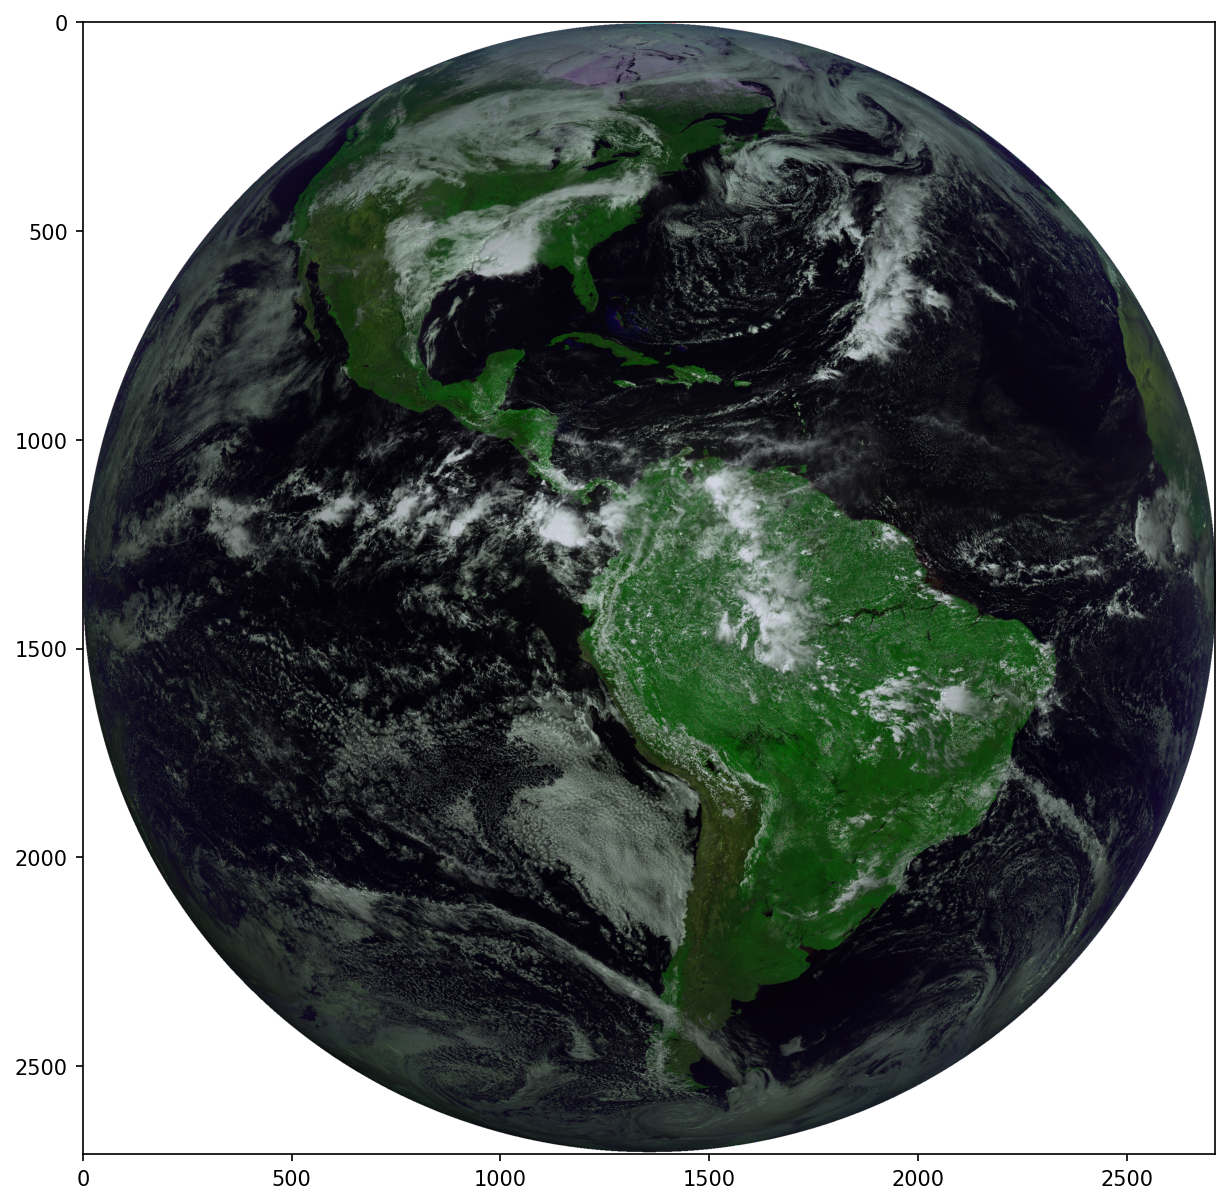

In [ ]:
plt.figure(figsize = (10,10),dpi=150)
plt.imshow(COLORES)